In [1]:
import pandas as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
csv_path = Path("outputs/Fires_2019.csv")
df_2019 = pd.read_csv(csv_path)

df_2019

,Year,Alarm Date,Containment Date,Cause #,GIS Calculated Acres,Cause
0,2019,11/15/2019,11/15/2019,14,14.535880,Unknown / Unidentified
1,2019,5/29/0219,5/29/0219,16,2.296940,Aircraft
2,2019,7/31/2019,7/31/2019,14,3.763960,Unknown / Unidentified
3,2019,10/31/2019,11/5/2019,14,10042.460000,Unknown / Unidentified
4,2019,10/30/2019,11/13/2019,14,1806.234000,Unknown / Unidentified
...,...,...,...,...,...,...
307,2019,10/17/2019,10/17/2019,10,1.984050,Vehicle
308,2019,8/5/2019,8/6/2019,2,1.919023,Equipment Use
309,2019,7/2/2019,7/2/2019,9,4.376543,Miscellaneous
310,2019,7/17/2019,7/19/2019,14,34.126640,Unknown / Unidentified


In [6]:
# Convert 'Alarm Date' to datetime with explicit format and handling errors
df_2019['Alarm Date'] = pd.to_datetime(df_2019['Alarm Date'], format='%m/%d/%Y', errors='coerce')

# Extract month name
df_2019['Month'] = df_2019['Alarm Date'].dt.strftime('%B')

# Group by month and calculate the number of incidents and total acres burned
monthly_summary_2019 = df_2019.groupby('Month').agg({
    'Alarm Date': 'count',
    'GIS Calculated Acres': 'sum'
}).rename(columns={'Alarm Date': 'Number of Incidents', 'GIS Calculated Acres': 'Total Acres Burned'}).reset_index()

# To ensure the months are in calendar order, you can set the month column as a Categorical type
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_summary_2019['Month'] = pd.Categorical(monthly_summary_2019['Month'], categories=months_order, ordered=True)
monthly_summary_2019 = monthly_summary_2019.sort_values('Month')

# Round 'Total Acres Burned' to 2 decimal places
monthly_summary_2019['Total Acres Burned'] = monthly_summary_2019['Total Acres Burned'].round(2)

# Display the summary
print(monthly_summary_2019)

       Month  Number of Incidents  Total Acres Burned
5      March                    3              617.25
0      April                    4              100.10
6        May                   21             5667.55
4       June                   58            13817.71
3       July                   49            28336.60
1     August                   46            12196.28
9  September                   68            95623.71
8    October                   45           118513.29
7   November                   16             5515.12
2   December                    1               12.63


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


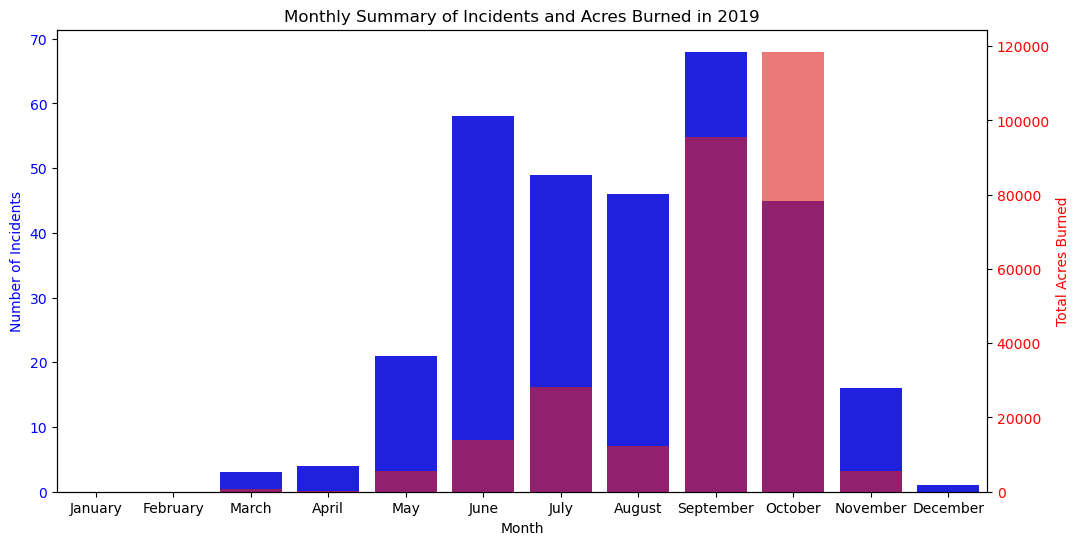

In [7]:
# Plotting a grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Number of Incidents
sns.barplot(data=monthly_summary_2019, x='Month', y='Number of Incidents', color='b', ax=ax1)
ax1.set_ylabel('Number of Incidents', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creating a second y-axis to plot Total Acres Burned
ax2 = ax1.twinx()
sns.barplot(data=monthly_summary_2019, x='Month', y='Total Acres Burned', color='r', alpha=0.6, ax=ax2)
ax2.set_ylabel('Total Acres Burned', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Monthly Summary of Incidents and Acres Burned in 2019')

output_path = Path("outputs")
os.makedirs(output_path, exist_ok=True)

# Save the plot as an image file in the "output" folder
output_file = os.path.join(output_path, "monthly_summary_2019.png")
plt.savefig(output_file)

plt.show()